# Univariate Gaussian

## Packages

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.optimize import minimize

## Generate random variables

Generate a vector of normal random variables, shape `(n,)`

In [52]:
# set the random seed
rng = np.random.default_rng(42)
# generate a sample of normally distributed random variables with mean mu and variance var
mu = 10
var = 2
sample = rng.normal(mu, var, 10000)

print(sample.shape)

(10000,)


## Define Normal Distribution Class

The probability density function of the univariate Gaussian is given by:

$$f(x | \mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi \sigma^{2}}}e^{-\frac{1}{2\sigma^{2}}(x - \mu)^{2}}$$

In [53]:
class NormalDistribution:
    def __init__(self):
        self.mu_ = None
        self.var_ = None
        
    def fit(self, x):
        """
            Fit the mean and variance of the
            Gaussian model using the mean and
            variance of the provided sample, x.
        """
        self.mu_ = x.mean()
        self.var_ = x.var()
        
    def pdf(self, x):
        """
            Return a vector (shape of x) of the probabilities
            of the values of x
        """
        first_factor = 1 / (np.sqrt(2*np.pi*self.var_))
        second_factor = np.exp(-1/(2*self.var_)*(x - self.mu_)**2)
        return first_factor*second_factor

# instantiate the NormalDistribution class
ndist = NormalDistribution()
# fit the NormalDistribution model to the sample generated above
ndist.fit(sample)

## Plotting

We can plot a histogram of the sample generated by the pseudo-random number generator, and then fit a curve on top of the normal distribution using the paramters we fitted to the sample.

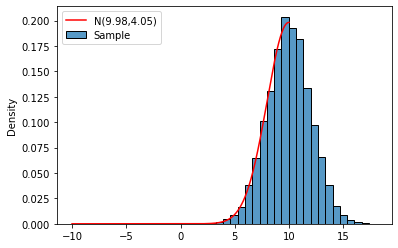

In [54]:
# generate x-axis points for plotting the pdf
xrange = np.linspace(-10, 10, 1000)
# get probability values for associated x
zrange = ndist.pdf(xrange)

# plot
sns.histplot(sample, bins=25, stat='density', label="Sample")
plt.plot(xrange, zrange, color='red', label=f"N({ndist.mu_:.2f},{ndist.var_:.2f})")
plt.legend()

## Maximum Likelihood Estimation

Here we minimise the likelihood function for the univariate Gaussian pdf. This allows us to find the best-fitting parameters.

The log-likelihood of the univariate Gaussian is given by:

$$\log \mathcal{L}(\mu, \sigma^{2}) = -\frac{n}{2} \log (2\pi) - \frac{n}{2} \log \sigma^{2} - \frac{1}{2\sigma^{2}}\sum_{i = 1}^{n} (x_{i} - \mu)^{2}$$

and hence we want to minimise

$$\hat{\mu}, \hat{\sigma} = \text{argmin}_{\mu, \sigma} -\log \mathcal{L}(\mu, \sigma^{2})$$

In [59]:
def model(params):
    """
        Define a linear function for mu
    """
    a, b, c = params
    return a + b * np.log(c)

In [60]:
# define the univariate Gaussian likelihood
def likelihood(params, x):
    mu = model(params)
    sigma = 2
    n = len(x)
    L = (n/2)*np.log(2*np.pi)+(n/2)*np.log(sigma**2)+(1/(2*sigma**2))*sum((x-mu)**2)
    return L

In [69]:
lik_model = minimize(likelihood, x0=[2, 3, 4], args=(sample), method="Nelder-Mead",
                     tol=1e-6, options={"disp": True})

lik_model.x

Optimization terminated successfully.
         Current function value: 21183.912377
         Iterations: 70
         Function evaluations: 142


array([2.33641025, 4.6765492 , 5.12609397])